In [1]:
import pandas as pd
import numpy as np
#add other dependencies for visuals

In [2]:
#path_link="Data/Seasons_Episodes/output/charlines_df.csv"
#df_charlines = pd.read_csv(path_link)
df_charlines = pd.read_csv("/Users/jacquelineskunda/Documents/GitHub/696/Milestone2/Data/Seasons_Episodes/output/charlines_df.csv")

In [3]:
#df_charlines.info()

In [4]:
df_charlines.head(3)

,Unnamed: 0,index,Character,Dialog,Season,Episode,Fix Name,Character_Fix,Spoke_Before,Character_Keep,Length Dialog
0,0,3,HOPPER,NaN,3,5,True,HOPPER,NaN,Keep,0
1,0,3,HOPPER,NaN,3,5,True,HOPPER,NaN,Keep,0
2,0,3,HOPPER,NaN,3,5,True,HOPPER,NaN,Keep,0


In [5]:
df_charlines.loc[df_charlines["Spoke_Before"].isnull(),'Spoke_Before'] = df_charlines['Character_Fix']

In [6]:
df_charlines.head(3)

,Unnamed: 0,index,Character,Dialog,Season,Episode,Fix Name,Character_Fix,Spoke_Before,Character_Keep,Length Dialog
0,0,3,HOPPER,NaN,3,5,True,HOPPER,HOPPER,Keep,0
1,0,3,HOPPER,NaN,3,5,True,HOPPER,HOPPER,Keep,0
2,0,3,HOPPER,NaN,3,5,True,HOPPER,HOPPER,Keep,0


In [7]:
df_charlines.tail(3)

,Unnamed: 0,index,Character,Dialog,Season,Episode,Fix Name,Character_Fix,Spoke_Before,Character_Keep,Length Dialog
6065,39,270,CLAUDIA,Where did you see it last?,2,9,True,CLAUDIA,SUSAN,Keep,26
6066,39,270,CLAUDIA,What's in there that's so important anyway? ...,2,9,True,CLAUDIA,SUSAN,Keep,132
6067,39,270,CLAUDIA,That's your ride! Dusty??? The bag from Melva...,2,9,True,CLAUDIA,SUSAN,Keep,75


In [8]:
df_charlines.dropna(subset=['Dialog'],inplace = True)

In [9]:
df_charlines.drop(['Unnamed: 0'], axis=1, inplace = True)
df_charlines.shape

(5457, 10)

In [10]:
df_charlines['Dialog_Check'] = df_charlines['Dialog'].apply(lambda x: x.isdigit())

In [11]:
df_charlines['Remove_Lines'] = df_charlines['Dialog'].apply(lambda x: True if "1/" in x else False)

In [12]:
#df_charlines[df_charlines['Remove_Lines']==True]
#removing odd script lines when based on location setting that were caught
df_charlines2 = df_charlines[df_charlines['Remove_Lines']==False].copy()

In [13]:
# reordering columns
cols = list(df_charlines2)
# move the column to head of list using index, pop and insert
cols.insert(0, cols.pop(cols.index('Character_Fix')))
#print(cols)
#['Character_Fix', 'Character', 'Dialog', 'Season', 'Episode', 'Fix Name', 'Length Dialog', 'Character_Keep', 
#'Dialog_Check', 'Remove_Lines']
# use index to reorder
df_charlines2 = df_charlines2.loc[:, cols]

In [14]:
df_charlines2.head(3)

,Character_Fix,index,Character,Dialog,Season,Episode,Fix Name,Spoke_Before,Character_Keep,Length Dialog,Dialog_Check,Remove_Lines
5,HOPPER,3,HOPPER,Looks like somebody’s home. As the truck parks...,3,5,True,HOPPER,Keep,341,False,False
6,HOPPER,3,HOPPER,Where’s that coming from? Joyce pauses at the ...,3,5,True,HOPPER,Keep,165,False,False
7,HOPPER,3,HOPPER,"Hey, dipshits! The men drop their tools and st...",3,5,True,HOPPER,Keep,80,False,False


In [15]:
df_charlines2.shape

(5451, 12)

In [16]:
import plotly as py
import plotly.express as px
import numpy as np
import re
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from collections import Counter
from nltk import word_tokenize
import nltk

#order = df["Character_Fix"].unique()
#dialog = df["Dialog"]
#dialogCounts = dialog.value_counts()
#dialogCounts = dialogCounts.sort_values(ascending = False)[0:50]

In [17]:
df = df_charlines2.copy()
df['Dialog_clean'] = df['Dialog'].apply(lambda x: re.sub(r'[^\w\s]','',x))
df['Dialog_tokenized'] = df['Dialog_clean'].apply(lambda x: word_tokenize(x.strip().lower()))
df['Dialog_Count'] = df['Dialog_tokenized'].apply(lambda x: len(x))
LinesSpokeDf = df.groupby(['Character_Fix'])["Dialog_Count"].sum().reset_index()
LinesSpokeDf = LinesSpokeDf.sort_values(by=["Dialog_Count"], ascending = False)

In [18]:
_20df = LinesSpokeDf.head(20)

In [19]:
top20chars = list(_20df.Character_Fix.unique())

In [20]:
print(top20chars)

['HOPPER', 'MIKE', 'STEVE', 'DUSTIN', 'JOYCE', 'NANCY', 'ROBIN', 'MAX', 'JONATHAN', 'LUCAS', 'WILL', 'ELEVEN', 'MURRAY', 'BILLY', 'ERICA', 'KAREN', 'DR BRENNER', 'MAYOR KLINE', 'DR OWENS', 'TOM']


In [21]:
top20df = df[df['Character_Fix'].isin(top20chars)].copy()

In [22]:
print(list(top20df.Character_Fix.unique()))

['HOPPER', 'JOYCE', 'JONATHAN', 'ROBIN', 'STEVE', 'NANCY', 'TOM', 'MAX', 'ELEVEN', 'DUSTIN', 'ERICA', 'LUCAS', 'WILL', 'KAREN', 'MIKE', 'MURRAY', 'BILLY', 'MAYOR KLINE', 'DR BRENNER', 'DR OWENS']


In [23]:
top20dfv2 = top20df[top20df['Season']==3]

In [24]:
### DR BRENNER is assumed to be dead in season 3 so it makes sense he is not in the top 20
### characters for season 3 and then dr owens is only is season 2 and season 4 and we 
### briefly see him in season 3 but not speaking.

drb = top20df[top20df['Character_Fix']=="DR BRENNER"]
dro = top20df[top20df['Character_Fix']=="DR OWENS"]
print(drb.Season.unique())
print(dro.Season.unique())

[1 4]
[4 2]


In [25]:
print(list(top20dfv2.Character_Fix.unique()))

['HOPPER', 'JOYCE', 'JONATHAN', 'ROBIN', 'STEVE', 'NANCY', 'TOM', 'MAX', 'ELEVEN', 'DUSTIN', 'ERICA', 'LUCAS', 'WILL', 'KAREN', 'MIKE', 'MURRAY', 'BILLY', 'MAYOR KLINE']


In [26]:
top20df_S3 = top20dfv2.groupby(['Character_Fix','Episode'])['Dialog_Count'].sum().reset_index()

In [27]:
top20df_S3.head()

,Character_Fix,Episode,Dialog_Count
0,BILLY,1,447
1,BILLY,2,246
2,BILLY,3,236
3,BILLY,4,340
4,BILLY,6,447


In [28]:
gender = pd.read_csv('/Users/jacquelineskunda/Documents/GitHub/696/Milestone2/Data/Seasons_Episodes/output/gender_st.csv')

In [29]:
gender

,Character_Fix,Gender,Age
0,AGENT FRAZIER,Female,1
1,AGENT HARMON,Male,1
2,ALEXEI,Male,1
3,ANDY,Male,2
4,ARGYLE,Male,2
...,...,...,...
57,VICKIE,Female,2
58,VICTOR CREEL,Male,1
59,WAYNE,Male,1
60,WILL,Male,2


In [30]:
gender_20df = pd.merge(_20df, gender, on="Character_Fix")

In [31]:
gender_20df['Gender'] = gender_20df['Gender'].apply(lambda x: x.strip())

In [32]:
gender

,Character_Fix,Gender,Age
0,AGENT FRAZIER,Female,1
1,AGENT HARMON,Male,1
2,ALEXEI,Male,1
3,ANDY,Male,2
4,ARGYLE,Male,2
...,...,...,...
57,VICKIE,Female,2
58,VICTOR CREEL,Male,1
59,WAYNE,Male,1
60,WILL,Male,2


In [33]:
fulldf_gen = pd.merge(df, gender, on="Character_Fix")
fulldf_gen['Gender'] = fulldf_gen['Gender'].apply(lambda x: x.strip())
eggos = fulldf_gen.groupby(['Age'])['Dialog_Count'].sum().reset_index()

In [34]:
Total = eggos['Dialog_Count'].sum()
eggos['percent'] = eggos.Dialog_Count.apply(lambda x: x/Total)


In [35]:
sent_dict = top20dfv2.groupby('Character_Fix')['Dialog_clean'].apply(list).reset_index()#.apply(list).to_dict()

In [36]:
sent_dict['Dialog_clean'] = sent_dict['Dialog_clean'].apply(lambda x: ".".join(str(e) for e in x))

In [37]:
sent_dict.head()

,Character_Fix,Dialog_clean
0,BILLY,Dont be afraid Itll be over soon Just try and...
1,DUSTIN,Shit Shit.Why dont these buttons work.What do ...
2,ELEVEN,JONATHAN . KAREN WHEELER .I found him MIKE WI...
3,ERICA,Press the button.JUST THEN the elevator comes ...
4,HOPPER,Looks like somebodys home As the truck parks w...


In [38]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()


def polarity(text):
    pol = sid.polarity_scores(text)
    return pol
sent_dict['Dialog_clean'] = sent_dict['Dialog_clean'].apply(lambda x: x.lower())
sent_dict['polarity'] = sent_dict['Dialog_clean'].apply(polarity)  #polarity checking
sent_dict['compound']  = sent_dict['polarity'].apply(lambda score_dict: score_dict['compound'])

sent_dict['sentiment'] = sent_dict['compound'].apply(lambda x: "Positive" if x>=0.5 \
                                                     else("Negative" if x<=-0.5 \
                                                     else "Neutral"))
print("polarity checked successfull")

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/jacquelineskunda/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


polarity checked successfull


In [39]:
sent_dict.head(3)

,Character_Fix,Dialog_clean,polarity,compound,sentiment
0,BILLY,dont be afraid itll be over soon just try and...,"{'neg': 0.116, 'neu': 0.815, 'pos': 0.069, 'co...",-0.9982,Negative
1,DUSTIN,shit shit.why dont these buttons work.what do ...,"{'neg': 0.091, 'neu': 0.803, 'pos': 0.106, 'co...",0.9970,Positive
2,ELEVEN,jonathan . karen wheeler .i found him mike wi...,"{'neg': 0.088, 'neu': 0.819, 'pos': 0.093, 'co...",0.9724,Positive


### Start of supervised Learning

In [40]:
df_show = df[['Character_Fix','Season',"Episode","Dialog"]].copy()

In [41]:
df_show.head(3)

,Character_Fix,Season,Episode,Dialog
5,HOPPER,3,5,Looks like somebody’s home. As the truck parks...
6,HOPPER,3,5,Where’s that coming from? Joyce pauses at the ...
7,HOPPER,3,5,"Hey, dipshits! The men drop their tools and st..."


In [42]:
# Function to preprocess text
def cleaner(text):
  	# Create doc object
    doc = nlp(text)
    
    # Generate lemmas and lower case and remove punctuation
    lemmas = [token.lemma_.lower() for token in doc if not token.is_punct\
              and token.is_alpha]
    #token.is_stop == False 
    # Remove stopwords, extra characters like numbers (second check)
    #all_lemmas = [lemma for lemma in lemmas if lemma.isalpha]
    
    return " ".join(lemmas)

In [43]:
import spacy
from spacy import displacy
import seaborn as sns
import string
import nltk
import en_core_web_sm
#nlp = en_core_web_sm.load()
nlp = spacy.load('en_core_web_sm')

In [44]:
df_show['token_lemma'] = df_show['Dialog'].apply(cleaner)

In [45]:
df_show.head(3)

,Character_Fix,Season,Episode,Dialog,token_lemma
5,HOPPER,3,5,Looks like somebody’s home. As the truck parks...,look like somebody home as the truck park we r...
6,HOPPER,3,5,Where’s that coming from? Joyce pauses at the ...,where that come from joyce pause at the foot o...
7,HOPPER,3,5,"Hey, dipshits! The men drop their tools and st...",hey dipshit the man drop their tool and stand ...


Supervised learning classification techniques:   
Logistic Regression: to understand the strength of relationships by leveraging signals to approximate the most appropriate classification. This will be our baseline for classification.    
Random Forest Classifier: to perform classification tasks on noisy and/or highly dimensional data by making use of an ensemble of decision trees for classification.     
LinearSVM based regression: generalization capability of the words/lines with high prediction accuracy for character name, robust to outliers. Will need to transform all lines of text into vectors in order to encode and leverage the power of SVM.     

Evaluation Metrics:
F1 Score : mean of precision and recall scores    
Precision : explains how many of the correctly predicted cases actually turned out to be positive. Precision is useful where False Positives are a higher concern than False Negatives.     
AUC (Area Under the Curve): to measure how well the classifier was able to distinguish different classes, if our dataset proves to be imbalanced which might be the case since characters do speak different volumes of lines etc.    
K-Fold cross validation accuracy: to measure and test if our various models' accuracy would be better, worse or the same if we had used a different section of the data set as a validation set. Evaluation is performed using different shuffling and chunking of the dataset through various iterations. This will be great because we can see the various scoring/evaluation metrics above at once (such as accuracy, precision, recall and f1)    
Visualizations:
Confusion matrix: in order to compare actual label versus predicted label (TP, TN, FP, FN) and identify proper (best) evaluation metrics/scoring to use.  
Histograms: to show frequency of characters predicted (by probability with use of bins)
We will try to inspect model performance via visualizations between different characters (classes).   
Line charts for visualizing AUC-ROC and other results/metrics.    
All visualizations will keep the Stranger Things aesthetic as well. Will look into building a visualization which is composed of characters face/faces with model output probabilities showing the confidence prediction. Or sentiment of characters lines spoken, we are sure there are characters which have more negative sentiment overall than others. We will scope out over the course of project work.    

### Linear SVM Classifier

In [46]:
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.model_selection import RandomizedSearchCV
from sklearn import model_selection
from sklearn.metrics import precision_recall_fscore_support
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

In [47]:
RANDOM_SEED = 655

In [48]:
df_show.head(3)

,Character_Fix,Season,Episode,Dialog,token_lemma
5,HOPPER,3,5,Looks like somebody’s home. As the truck parks...,look like somebody home as the truck park we r...
6,HOPPER,3,5,Where’s that coming from? Joyce pauses at the ...,where that come from joyce pause at the foot o...
7,HOPPER,3,5,"Hey, dipshits! The men drop their tools and st...",hey dipshit the man drop their tool and stand ...


In [49]:
df_show['length'] = df_show.token_lemma.apply(lambda x: len(x))

In [50]:
check = df_show.groupby(['length']).min().reset_index()

In [51]:
check.iloc[0:5,:]

,length,Character_Fix,Season,Episode,Dialog,token_lemma
0,0,STEVE,3,5,2/8,
1,2,BILLY,1,1,-- Hi...,go
2,3,DEPUTY CALLAHAN,1,1,... God --,and
3,4,ARGYLE,1,1,Boop.,boop
4,5,BILLY,1,1,", LUCAS",a man


In [52]:
df_show2= df_show.explode(column='token_lemma').dropna(subset=['token_lemma'])

In [53]:
df_show2.head(3)

,Character_Fix,Season,Episode,Dialog,token_lemma,length
5,HOPPER,3,5,Looks like somebody’s home. As the truck parks...,look like somebody home as the truck park we r...,303
6,HOPPER,3,5,Where’s that coming from? Joyce pauses at the ...,where that come from joyce pause at the foot o...,150
7,HOPPER,3,5,"Hey, dipshits! The men drop their tools and st...",hey dipshit the man drop their tool and stand ...,72


In [54]:
train_df, test_df = \
              np.split(df_show.sample(frac=1, random_state=RANDOM_SEED), 
                       [int(.8*len(df_show))])
print(len(train_df), len(test_df))

4360 1091


In [55]:
vectorizer = TfidfVectorizer(min_df = 20, stop_words = 'english')
X_train = vectorizer.fit_transform(train_df.token_lemma)
X_test = vectorizer.transform(test_df.token_lemma)

y_train=train_df['Character_Fix'].values
y_test=test_df['Character_Fix'].values


In [56]:
# Instantiate SVM linear multi class classifier with basic parameters
svm_nofeat_no_tune = svm.SVC(kernel='linear',
                             degree=3, 
                             gamma='auto',
                             random_state = RANDOM_SEED)
svm_nofeat_no_tune.fit(X_train,y_train)
# predict the labels on validation dataset
pred_SVM = svm_nofeat_no_tune.predict(X_test)

In [57]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test,pred_SVM))

Accuracy: 0.19615032080659944


### Terrible score now we hyperparameter tune!

In [58]:
param_grid_ = {'C': [0.1, 1, 5, 10, 100,1000], 
                            'degree' :[0,1,2,3,9,12,15,20],
                            'gamma': ['auto',100, 10, 1, 0.5, 0.1, 0.01, 0.001],
                            'kernel': ['linear','rbf', 'poly', 'sigmoid']}

In [59]:
svm_tuner = svm.SVC(random_state=RANDOM_SEED)
svm_random = RandomizedSearchCV(estimator=svm_tuner,
                               param_distributions=param_grid_,
                               cv=5,
                               verbose=1,
                               random_state=RANDOM_SEED,
                               n_jobs = -1
                               )

svm_random.fit(X_train,y_train)

print(svm_random.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=5.



0.19793577981651375


In [60]:
print("Tuned Hyperparameters:", svm_random.best_params_)

Tuned Hyperparameters: {'kernel': 'linear', 'gamma': 0.01, 'degree': 1, 'C': 1}


### Accuracy is still terrible so we will do two things to try and help out the data set.   
### 1. Only use characters who are top 20 characters (1st attempt)
### 2. 1st attempt along with only getting spoken dialog where there are more than 2 or 3 words.

### We can also add the gender along with season and episode and age (1 = adult, 2 = child/teenage, 0 = no age)

In [61]:
df = pd.DataFrame(list(zip(y_test,pred_SVM)), columns = ['Character', 'Predicted'])
#df['Error'] = df['Character'] - df['Predicted']

#Plot the joint distribution
#Let's start by seeing how the two distributions line up
#sns.barplot(data=df, x='Character', y='Predicted', kind="hex", color="red",
#             )

In [62]:
df_tf = pd.DataFrame(X_train.toarray(), columns=vectorizer.get_feature_names_out())

In [63]:
df_tf.shape

(4360, 289)

In [64]:
df_tf.head(3)

,actually,ago,ahead,alexei,answer,approach,arm,ask,attention,away,...,whoa,window,word,work,world,wrong,yeah,year,yes,yuri
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [65]:
train_df.shape

(4360, 6)

In [66]:
tr_df = train_df.reset_index()

In [67]:
train_w_feat = pd.concat([df_tf,tr_df],axis=1)

In [68]:
train_w_feat.shape

(4360, 296)

In [69]:
train_w_feat.drop(['Dialog','token_lemma','index'], axis=1, inplace=True)

In [70]:
train_w_features = pd.merge(train_w_feat, gender, on="Character_Fix",how='left')

In [71]:
fix = train_w_features[train_w_features.Gender.isnull()]

In [72]:
fix

,actually,ago,ahead,alexei,answer,approach,arm,ask,attention,away,...,yeah,year,yes,yuri,Character_Fix,Season,Episode,length,Gender,Age


In [73]:
#train_w_features2 =train_w_features[train_w_features['length']>=3].copy()

In [74]:
train_w_features3 = train_w_features.drop(['Character_Fix'], axis=1).copy()

In [75]:
train_w_features3['Gender'].replace(['Female ', 'Female','Male','Male ','Neutral'],
                        [1, 1,2,2,0], inplace=True)

In [76]:
train_w_features3.head(3)

,actually,ago,ahead,alexei,answer,approach,arm,ask,attention,away,...,wrong,yeah,year,yes,yuri,Season,Episode,length,Gender,Age
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1,2,18,1,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,4,4,16,2,2
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,3,3,136,2,2


In [77]:
svm_bfeat_nt = svm.SVC(kernel = 'linear',
                       degree=3, 
                       gamma = 'auto',
                       random_state = RANDOM_SEED).fit(train_w_features3, y_train)

In [78]:
len(y_train)

4360

In [79]:
len(y_test)

1091

In [80]:
df_tf_test = pd.DataFrame(X_test.toarray(), columns=vectorizer.get_feature_names_out())

In [81]:
tr_df_test = test_df.reset_index()

In [82]:
test_w_feat = pd.concat([df_tf_test,tr_df_test],axis=1)
test_w_feat.drop(['Dialog','token_lemma','index'], axis=1, inplace=True)
test_w_features = pd.merge(test_w_feat, gender, on="Character_Fix",how='left')
test_w_features3 = test_w_features.drop(['Character_Fix'], axis=1).copy()
test_w_features3['Gender'].replace(['Female ', 'Female','Male','Male ','Neutral'],
                        [1, 1,2,2,0], inplace=True)
test_w_features3.shape

(1091, 294)

In [84]:
y_pred_svm_basicfeat_notune =svm_bfeat_nt.predict(test_w_features3)

In [85]:
len(y_pred_svm_basicfeat_notune)

1091

In [86]:
accm2 = metrics.accuracy_score(y_test,y_pred_svm_basicfeat_notune)

In [87]:
accm2

0.461961503208066

In [89]:
train_score_no_tune_with_features = svm_bfeat_nt.score(train_w_features3, y_train)

In [90]:
train_score_no_tune_with_features

0.6135321100917431

### Try this with our new hyper parameters since it was at 19% and is now out 46.1% with adding some features to the data.


In [92]:
svm_tuned_basicfeat = svm.SVC(kernel= 'linear', gamma= 0.01, degree= 1,
                              C= 1,
                              random_state=RANDOM_SEED,).fit(train_w_features3, y_train)

y_pred_svm_tuned = svm_tuned_basicfeat.predict(test_w_features3)
accm_tuned = metrics.accuracy_score(y_test,y_pred_svm_tuned)
print(accm_tuned)
acc_train = svm_tuned_basicfeat.score(train_w_features3, y_train)
print(acc_train)

0.461961503208066
0.6135321100917431


### So we are not getting far, it didnt perfom much better tuned - same test scores and lower accuracy.  I think dropping data from the org data based on length of line spoken and how often a character occurs along with text difficulty as well as keeping our features we already just used (gender, season, episode) will help this process along.  We can try and add in who spoke durng scene as well to see if it helps.  We would be thrilled if this was able to get over 50%.  We knew after performing EDA and QAing the data there were issues with just using pdf's in general and then through the show there actually isnt much dialog as one would hope, it is more scene setting and action.

### Next drop out rows where length is less than 2 or 3 and redo training/hyperparameter tuning and/or characters who speak less than 5 times, maybe standard scale new df

### I think what also needs to happen is hyper parameter tuning with these features and data

In [93]:
### starting with the data and features - not split yet.
df_show.head(2)

,Character_Fix,Season,Episode,Dialog,token_lemma,length
5,HOPPER,3,5,Looks like somebody’s home. As the truck parks...,look like somebody home as the truck park we r...,303
6,HOPPER,3,5,Where’s that coming from? Joyce pauses at the ...,where that come from joyce pause at the foot o...,150


In [94]:
df_sh2 = df_show.merge(gender, how="left", on ='Character_Fix')

In [95]:
df_sh2.head(2)

,Character_Fix,Season,Episode,Dialog,token_lemma,length,Gender,Age
0,HOPPER,3,5,Looks like somebody’s home. As the truck parks...,look like somebody home as the truck park we r...,303,Male,1
1,HOPPER,3,5,Where’s that coming from? Joyce pauses at the ...,where that come from joyce pause at the foot o...,150,Male,1


In [96]:
#pip install textstat

In [97]:
import textstat
df_sh2['grade'] = df_sh2.Dialog.apply(lambda x: textstat.flesch_kincaid_grade(x))
df_sh2['difficulty'] = df_sh2.Dialog.apply(lambda x: textstat.difficult_words(x))

In [98]:
df_sh2.head(2)

,Character_Fix,Season,Episode,Dialog,token_lemma,length,Gender,Age,grade,difficulty
0,HOPPER,3,5,Looks like somebody’s home. As the truck parks...,look like somebody home as the truck park we r...,303,Male,1,2.6,11
1,HOPPER,3,5,Where’s that coming from? Joyce pauses at the ...,where that come from joyce pause at the foot o...,150,Male,1,2.8,3


In [99]:
#adding the compound score on again but with the token lemma

df_sh2['polarity'] = df_sh2['token_lemma'].apply(polarity)  #polarity checking
df_sh2['compound']  = df_sh2['polarity'].apply(lambda score_dict: score_dict['compound'])

df_sh2['sentiment'] = df_sh2['compound'].apply(lambda x: "Positive" if x>=0.5 \
                                                     else("Negative" if x<=-0.5 \
                                                     else "Neutral"))
print("polarity checked successfull")

polarity checked successfull


In [100]:
#removing short spoken lines like, no, what, so , hey, yep etc 
#basically when someone spoke 3 words or less
df_sh2['length_spk'] = df_sh2['token_lemma'].apply(lambda x: len(x.split()))

In [101]:
df_sh2 = df_sh2[df_sh2['length_spk'] >3].copy()

In [102]:
df_sh2.head(2)

,Character_Fix,Season,Episode,Dialog,token_lemma,length,Gender,Age,grade,difficulty,polarity,compound,sentiment,length_spk
0,HOPPER,3,5,Looks like somebody’s home. As the truck parks...,look like somebody home as the truck park we r...,303,Male,1,2.6,11,"{'neg': 0.089, 'neu': 0.881, 'pos': 0.03, 'com...",-0.3612,Neutral,59
1,HOPPER,3,5,Where’s that coming from? Joyce pauses at the ...,where that come from joyce pause at the foot o...,150,Male,1,2.8,3,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral,31


In [103]:
check_appearance = df_sh2.groupby(['Character_Fix'])['Character_Fix'].count()

In [104]:
appearance = pd.DataFrame({'Character_Fix':check_appearance.index, 'Num':check_appearance.values})

In [105]:
appearance.sort_values(by='Num')

,Character_Fix,Num
3,ANDY,1
52,TROY,1
51,TOMMY,1
29,JAMES,1
13,DEMOGORGON,1
55,VICTOR CREEL,2
54,VICKIE,2
49,TERRY,2
8,BOB,2
25,HENRY,2


In [106]:
df_sh2 = df_sh2.merge(appearance, how="left", on ='Character_Fix').copy()

In [107]:
df_sh2 = df_sh2[df_sh2['Num']> 2].copy()

In [108]:
df_sh2['Gender'].replace(['Female ', 'Female','Male','Male ','Neutral'],
                        [1, 1,2,2,0], inplace=True)

In [109]:
df_sh2['sentiment'].replace(['Negative', 'Neutral','Positive'],
                        [-1,0,1], inplace=True)

In [110]:
df_sh2.drop(columns=['Dialog','length','polarity'],inplace=True, axis = 1)

In [111]:
df_sh2.head(3)

,Character_Fix,Season,Episode,token_lemma,Gender,Age,grade,difficulty,compound,sentiment,length_spk,Num
0,HOPPER,3,5,look like somebody home as the truck park we r...,2,1,2.6,11,-0.3612,0,59,501
1,HOPPER,3,5,where that come from joyce pause at the foot o...,2,1,2.8,3,0.0000,0,31,501
2,HOPPER,3,5,hey dipshit the man drop their tool and stand ...,2,1,0.3,1,-0.2500,0,15,501


### Let's vectorize and train with our hyper parameters designated above before we re-tune with this new df with more features and removal of characters who appeared two times or less and removal of character rows when they spoke who spoke 3 words or less.

In [112]:
#df_sh2.shape

In [113]:
#df_train2 = df_sh2.drop(columns=['Character_Fix'],axis=1)

In [114]:
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(x_var_2d, y_var, test_size = .2)
train_df2_fin, test_df2_fin = \
              np.split(df_sh2.sample(frac=1, random_state=RANDOM_SEED), 
                       [int(.8*len(df_sh2))])


In [115]:
print(len(train_df2_fin), len(test_df2_fin))

3712 928


In [116]:
vectorizer2 = TfidfVectorizer(min_df = 20, stop_words = 'english')
X_train2 = vectorizer2.fit_transform(train_df2_fin.token_lemma)
X_test2 = vectorizer2.transform(test_df2_fin.token_lemma)

In [117]:
y_train2=train_df2_fin['Character_Fix'].values
y_test2=test_df2_fin['Character_Fix'].values

In [118]:
# X_scaler2 = preprocessing.StandardScaler(with_mean=False).fit_transform(X_train2)
# X_test_Scaler2 = preprocessing.StandardScaler(with_mean=False).fit_transform(X_test2)

In [119]:
df_tf2_fin = pd.DataFrame(X_train2.toarray(), columns=vectorizer2.get_feature_names_out())
train_df2_fin.reset_index(inplace=True)
fin_train_w_feat = pd.concat([df_tf2_fin,train_df2_fin],axis=1)
fin_train_w_feat.drop(['token_lemma','index'], axis=1, inplace=True)

#doing the same to the test data
df_tf_test_fin = pd.DataFrame(X_test2.toarray(), columns=vectorizer2.get_feature_names_out())
final_df_test = test_df2_fin.reset_index()
test_w_feat_final = pd.concat([df_tf_test_fin,final_df_test],axis=1)
test_w_feat_final.drop(['token_lemma','index'], axis=1, inplace=True)
#drpping character label names
test_w_feat_final.drop(['Character_Fix'],axis=1,inplace = True)
fin_train_w_feat.drop(['Character_Fix'], axis=1, inplace=True)

In [120]:
#now we try it out
svm_model_tuned_morefeat = svm.SVC(kernel= 'linear', gamma= 0.01, degree= 1,
                              C= 1,
                              random_state=RANDOM_SEED,).fit(fin_train_w_feat, y_train2)

y_pred_svm_model_tuned2 = svm_model_tuned_morefeat.predict(test_w_feat_final)


accm_tuned2 = metrics.accuracy_score(y_test2,y_pred_svm_model_tuned2)
print(accm_tuned2)

acc_train2 = svm_model_tuned_morefeat.score(fin_train_w_feat, y_train2)
print(acc_train2)

0.9924568965517241
0.9986530172413793


#### This is getting too good lets tune with our model which has features and row removed (based on too few appearences overall and too few words spoken

In [121]:
# X_train_scaler_final = preprocessing.StandardScaler(with_mean=False).fit_transform(fin_train_w_feat)
# X_test_scaler_final = preprocessing.StandardScaler(with_mean=False).fit_transform(test_w_feat_final)

param_grid_2 =  {'C': [0.1, 1, 5, 10, 100,1000], 
                            'degree' :[0,1,2,3,9,12,15,20],
                            'gamma': ['auto',100, 10, 1, 0.5, 0.1, 0.01, 0.001],
                            'kernel': ['linear','rbf', 'poly', 'sigmoid']}

svm_tuner = svm.SVC(random_state=RANDOM_SEED)
svm_random2 = RandomizedSearchCV(estimator=svm_tuner,
                               param_distributions=param_grid_,
                               cv=5,
                               verbose=1,
                               random_state=RANDOM_SEED,
                               n_jobs = -1
                               )


svm_random2.fit(fin_train_w_feat,y_train2)

print(svm_random2.best_score_)
print("Tuned Hyperparameters:", svm_random2.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning:

The least populated class in y has only 2 members, which is less than n_splits=5.



0.9892234076901032
Tuned Hyperparameters: {'kernel': 'linear', 'gamma': 0.01, 'degree': 1, 'C': 1}


In [125]:
#now we try it out
svm_tuned3 = svm.SVC(kernel = 'linear', gamma = 0.01, degree = 1, C = 1,
                              random_state=RANDOM_SEED,
                              ).fit(fin_train_w_feat, y_train2)

y_pred_svm3 = svm_tuned3.predict(test_w_feat_final)

accm_tuned3 = metrics.accuracy_score(y_test2,y_pred_svm3)
print(accm_tuned3)
acc_train3 = svm_tuned3.score(fin_train_w_feat, y_train2)
print(acc_train3)

0.9924568965517241
0.9986530172413793


Classification report of imbalanced LinearSVM 
                   precision    recall  f1-score   support

   AGENT FRAZIER       1.00      1.00      1.00         1
    AGENT HARMON       1.00      1.00      1.00         2
          ALEXEI       1.00      1.00      1.00         4
          ARGYLE       1.00      1.00      1.00         7
         BARBARA       1.00      1.00      1.00         4
           BENNY       1.00      1.00      1.00         2
           BILLY       1.00      1.00      1.00        22
           BRUCE       1.00      1.00      1.00         6
           CAROL       1.00      1.00      1.00         2
COLONEL SULLIVAN       1.00      1.00      1.00         2
 DEPUTY CALLAHAN       1.00      0.75      0.86         4
          DMITRI       1.00      0.50      0.67         6
      DR BRENNER       1.00      1.00      1.00        11
        DR OWENS       0.70      1.00      0.82         7
          DUSTIN       1.00      1.00      1.00        82
           EDDIE       

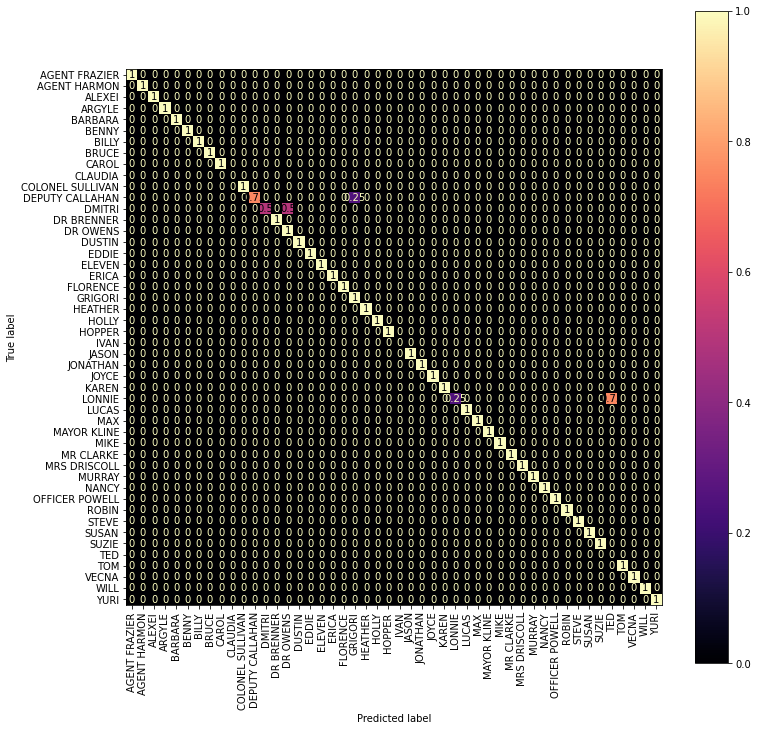

In [126]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plot
print('Classification report of imbalanced LinearSVM \n',classification_report(y_test2,y_pred_svm3,
                                                                                zero_division = 0))

cm = confusion_matrix(y_test2,y_pred_svm3,normalize='true',
                      labels=svm_tuned3.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=svm_tuned3.classes_)
fig2, ax2 = plot.subplots(figsize=(12,12))
disp.plot(cmap='magma', ax=ax2,xticks_rotation='vertical')
plot.grid(False)


In [127]:
#from sklearn.metrics import RocCurveDisplay
#RocCurveDisplay.from_predictions(y_test2,y_pred_lg_model_tuned3)

#plt.show()

### Last filter for classification with features added to the data is to only use top 20 Characters, this value is based off length of lines spoken summed for a character across the entire data set.  This model is powerful it already is perfect, I dont think we need to do much more but to continue the same path we followed with the other models we will do top 20 as well.  

### It might be a nice add on to explore this failure by taking the characters and seeing their cosine similarity scores based on lines spoken compared to other characters for the Top 20.

In [128]:
train_top20_fin=train_df2_fin.copy()

train_top20_fin['TOP_20'] = train_top20_fin['Character_Fix'].apply(lambda x: \
                                True if x in top20chars else False)

print(len(top20chars))

train_top20_fin = train_top20_fin[train_top20_fin['TOP_20']==True].copy()

print(len(list(train_top20_fin.Character_Fix.unique())))

train_top20_fin.head()

20
20


,index,Character_Fix,Season,Episode,token_lemma,Gender,Age,grade,difficulty,compound,sentiment,length_spk,Num,TOP_20
0,2858,MIKE,1,2,i just i do feel good i wake up and my head it...,2,2,6.8,1,-0.6469,-1,48,442,True
2,2681,NANCY,3,1,no i mean i ca be late they like you no matter...,1,2,0.3,0,-0.2023,0,15,309,True
3,3106,KAREN,1,2,i not mad at you,1,1,-1.9,0,0.3875,0,5,87,True
4,774,BILLY,3,8,go the mind flayer tentacle have nearly envelo...,2,2,5.6,3,0.0000,0,12,116,True
5,474,HOPPER,3,8,murray all set down there,2,1,0.5,1,0.0000,0,5,501,True


In [129]:
train_top20_fin.groupby(['Character_Fix'])['length_spk'].min()

Character_Fix
BILLY          4
DR BRENNER     4
DR OWENS       4
DUSTIN         4
ELEVEN         4
ERICA          4
HOPPER         4
JONATHAN       4
JOYCE          4
KAREN          4
LUCAS          4
MAX            4
MAYOR KLINE    4
MIKE           4
MURRAY         4
NANCY          4
ROBIN          4
STEVE          4
TOM            7
WILL           4
Name: length_spk, dtype: int64

In [130]:
test_top20_fin=test_df2_fin.copy()

test_top20_fin['TOP_20'] = test_top20_fin['Character_Fix'].apply(lambda x: \
                                True if x in top20chars else False)

#print(len(top20chars))

test_top20_fin = test_top20_fin[test_top20_fin['TOP_20']==True].copy()

print(len(list(test_top20_fin.Character_Fix.unique())))

test_top20_fin.head()

20


,Character_Fix,Season,Episode,token_lemma,Gender,Age,grade,difficulty,compound,sentiment,length_spk,Num,TOP_20
3076,NANCY,1,2,nice the search party have move to the immedia...,1,2,6.6,12,0.8720,1,45,309,True
4260,LUCAS,4,8,we identify his most likely next victim lucas,2,2,6.4,3,-0.3321,0,8,216,True
4296,JONATHAN,4,8,sure you get your measurement right,2,2,2.1,1,0.3182,0,6,185,True
2279,WILL,3,7,he build it to stop eleven,2,2,0.9,0,-0.2960,0,6,151,True
1199,TOM,3,4,no as heather stand up billy kneel in front of...,2,1,0.5,1,-0.5574,-1,16,30,True


In [131]:
vectorizer_final_top20 = TfidfVectorizer(min_df = 20, stop_words = 'english')
X_train_top20 = vectorizer_final_top20.fit_transform(train_top20_fin.token_lemma)
X_test_top20 = vectorizer_final_top20.transform(test_top20_fin.token_lemma)

y_train_top20=train_top20_fin['Character_Fix'].values
y_test_top20=test_top20_fin['Character_Fix'].values

#scaling since it is sparce and the tuner didnt like it not scaled at any variatio or 
#iteration before
#X_scaler_top20 = preprocessing.StandardScaler(with_mean=False).fit_transform(X_train_top20)
#X_test_Scaler_top20 = preprocessing.StandardScaler(with_mean=False).fit_transform(X_test_top20)

#adding features back on to both train and test
df_top20_fin = pd.DataFrame(X_train_top20.toarray(), \
                          columns=vectorizer_final_top20.get_feature_names_out())
train_top20_fin.reset_index(inplace=True)
X_train_20fin = pd.concat([df_top20_fin,train_top20_fin],axis=1)
X_train_20fin.drop(['token_lemma','index','TOP_20'], axis=1, inplace=True)

#doing the same to the test data-adding features back on
df_tf_test_fin = pd.DataFrame(X_test_top20.toarray(), columns=vectorizer_final_top20.get_feature_names_out())
test_top20_fin.reset_index(inplace = True)
X_test_20fin = pd.concat([df_tf_test_fin,test_top20_fin],axis=1)
X_test_20fin.drop(['token_lemma','index','TOP_20'], axis=1, inplace=True)
#drpping character label names
X_test_20fin.drop(['Character_Fix'],axis=1,inplace = True)
X_train_20fin.drop(['Character_Fix'], axis=1, inplace=True)

In [132]:
X_train_20fin.isna().values.any()

False

In [133]:
X_test_20fin.isna().values.any()

False

### comment drop level_0 out if not needed be for shape error

In [134]:
#X_train_20fin

In [135]:
X_train_20fin.drop(['level_0'], axis=1, inplace=True)

In [136]:
svm_final_top20 = svm.SVC(kernel = 'linear', gamma = 0.01, degree = 1, C = 1,
                              random_state=RANDOM_SEED,).fit(X_train_20fin, y_train_top20)

y_pred_svm_top20 = svm_final_top20.predict(X_test_20fin)

accm20 = metrics.accuracy_score(y_test_top20,y_pred_svm_top20)
svm_model_SCR20 = svm_final_top20.score(X_test_20fin, y_test_top20)
svm_model_train_scr_top20 = svm_final_top20.score(X_train_20fin, y_train_top20)

print("Train Accuracy Score:",svm_model_train_scr_top20)
print("Test Accuracy Score:",accm20)
print("Test Accuracy Score:",svm_model_SCR20)

Train Accuracy Score: 1.0
Test Accuracy Score: 1.0
Test Accuracy Score: 1.0


### This model is powerful both are continually at 100% accuracy. This is amazing.

Classification report of Not Tuned Random Forest 
               precision    recall  f1-score   support

       BILLY       1.00      1.00      1.00        22
  DR BRENNER       1.00      1.00      1.00        11
    DR OWENS       1.00      1.00      1.00         7
      DUSTIN       1.00      1.00      1.00        82
      ELEVEN       1.00      1.00      1.00        40
       ERICA       1.00      1.00      1.00        22
      HOPPER       1.00      1.00      1.00       104
    JONATHAN       1.00      1.00      1.00        37
       JOYCE       1.00      1.00      1.00        64
       KAREN       1.00      1.00      1.00        19
       LUCAS       1.00      1.00      1.00        40
         MAX       1.00      1.00      1.00        55
 MAYOR KLINE       1.00      1.00      1.00        11
        MIKE       1.00      1.00      1.00        85
      MURRAY       1.00      1.00      1.00        30
       NANCY       1.00      1.00      1.00        62
       ROBIN       1.00      1

Text(0.5, 1.0, 'LinearSVM: Top 20 Characters only and All Features Tuned')

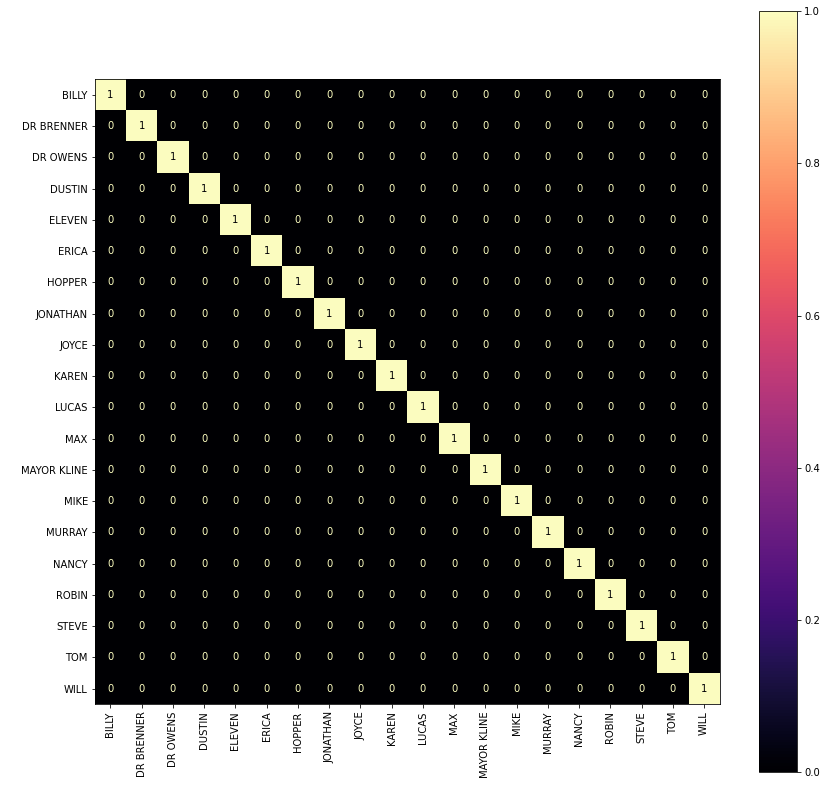

In [139]:
print('Classification report of Not Tuned Random Forest \n',classification_report(y_test_top20,
                                                                                  y_pred_svm_top20,
                                                                                  zero_division = 0))

cm20 = confusion_matrix(y_test_top20,y_pred_svm_top20,normalize='true',
                      labels=svm_final_top20.classes_)
disp20 = ConfusionMatrixDisplay(confusion_matrix=cm20,
                              display_labels=svm_final_top20.classes_)
fig2, ax2 = plot.subplots(figsize=(14,14))
disp20.plot(cmap='magma', ax=ax2,xticks_rotation='vertical')
plot.grid(False)
plot.rcParams.update({'text.color': "white",
                     'axes.labelcolor': "white"})
plot.title("LinearSVM: Top 20 Characters only and All Features Tuned",
          {'fontsize': 12,'color': "white"})

In [141]:
param_grid_top20 = {'C': [0.1, 1, 5, 10, 100,1000], 
                            'degree' :[0,1,2,3,9,12,15,20],
                            'gamma': ['auto',100, 10, 1, 0.5, 0.1, 0.01, 0.001],
                            'kernel': ['linear','rbf', 'poly', 'sigmoid']}

svm_tuner4 = svm.SVC(random_state=RANDOM_SEED)
svm_random4 = RandomizedSearchCV(estimator=svm_tuner4,
                               param_distributions=param_grid_top20,
                               cv=5,
                               verbose=1,
                               random_state=RANDOM_SEED,
                               n_jobs = -1
                               )

svm_random4.fit(X_train_20fin, y_train_top20)

print("Tuned Hyperparameters:", svm_random4.best_params_)
print("Accuracy:",svm_random4.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Tuned Hyperparameters: {'kernel': 'linear', 'gamma': 0.001, 'degree': 20, 'C': 10}
Accuracy: 1.0


### The parameters returned are tnot he same as the other tuners and this is just a chopped down dataset.  This model really just works well with adding features, I hope the accuracy for the test data set is still 1.0, otherwise we will use our model aboves parameters.

In [143]:
svm_final_top20_2 = svm.SVC(kernel = 'linear', gamma = 0.01, degree = 1, C = 1,
                              random_state=RANDOM_SEED).fit(X_train_20fin, y_train_top20)

y_pred_svm_top202 = svm_final_top20_2.predict(X_test_20fin)

accm20svm = metrics.accuracy_score(y_test_top20,y_pred_svm_top202)
svm_model_scr202 = svm_final_top20_2.score(X_test_20fin, y_test_top20)

svm_model_Train_scr_top20v2 = svm_final_top20_2.score(X_train_20fin, y_train_top20)

print("Train Accuracy Score:",svm_model_Train_scr_top20v2)

print("Test Accuracy Score:",accm20svm)

print("Test Accuracy Score:",svm_model_scr202)

Train Accuracy Score: 1.0
Test Accuracy Score: 1.0
Test Accuracy Score: 1.0


### Untuned same dataset

Classification report of imbalanced Random Forest Classifier 
               precision    recall  f1-score   support

       BILLY       0.80      0.55      0.65        22
  DR BRENNER       0.65      1.00      0.79        11
    DR OWENS       0.00      0.00      0.00         7
      DUSTIN       0.95      0.96      0.96        82
      ELEVEN       0.79      0.57      0.67        40
       ERICA       1.00      0.59      0.74        22
      HOPPER       0.99      1.00      1.00       104
    JONATHAN       0.69      0.59      0.64        37
       JOYCE       0.98      1.00      0.99        64
       KAREN       1.00      1.00      1.00        19
       LUCAS       0.70      0.57      0.63        40
         MAX       0.75      0.82      0.78        55
 MAYOR KLINE       0.58      0.64      0.61        11
        MIKE       0.96      1.00      0.98        85
      MURRAY       0.88      1.00      0.94        30
       NANCY       0.95      1.00      0.98        62
       ROBIN      

Text(0.5, 1.0, 'Random Forest: Top 20 Characters only and All Features')

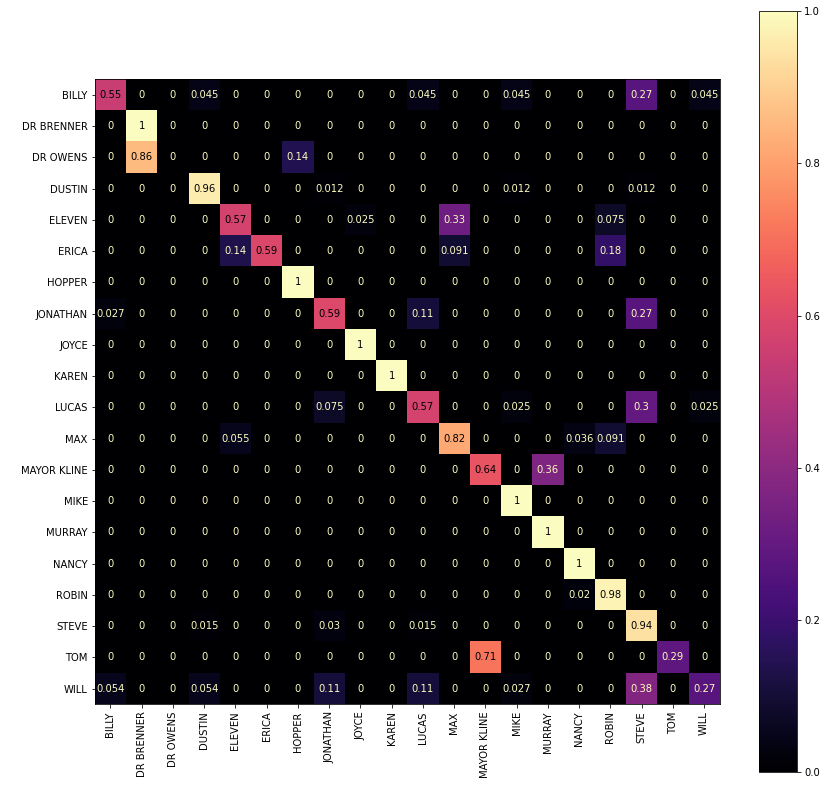

In [217]:
print('Classification report of imbalanced LinearSVM \n',classification_report(y_test_top20,y_pred_rc_top20,
                                                                                        zero_division = 0))

cm20v4 = confusion_matrix(y_test_top20,y_pred_rc_top20,normalize='true',
                      labels=rc_final_top20.classes_)
disp20v4 = ConfusionMatrixDisplay(confusion_matrix=cm20v4,
                              display_labels=rc_final_top20.classes_)
fig2, ax2 = plot.subplots(figsize=(14,14))
disp20v4.plot(cmap='magma', ax=ax2,xticks_rotation='vertical')
plt.grid(False)
plot.rcParams.update({'text.color': "white",
                     'axes.labelcolor': "white"})
plot.title("Random Forest: Top 20 Characters only and All Features Tuned",
          {'fontsize': 12,'color': "white"})


### Wow the test accuracy just stays at  100% regardless.  Regardless of changes we make such a feature additions such as gender, age (age group), season, episode, text difficulty, text grade level, sentiment compound value, sentiment category based on compound value, length of token for a line, total num words spoken and removal of instances where the character spoke 3 words or less based on token_lemma length it seems to be perfect accuracy. 

### Lets look at the correlation of the different features and categorize the character names

(4640, 12)
['Character_Fix']


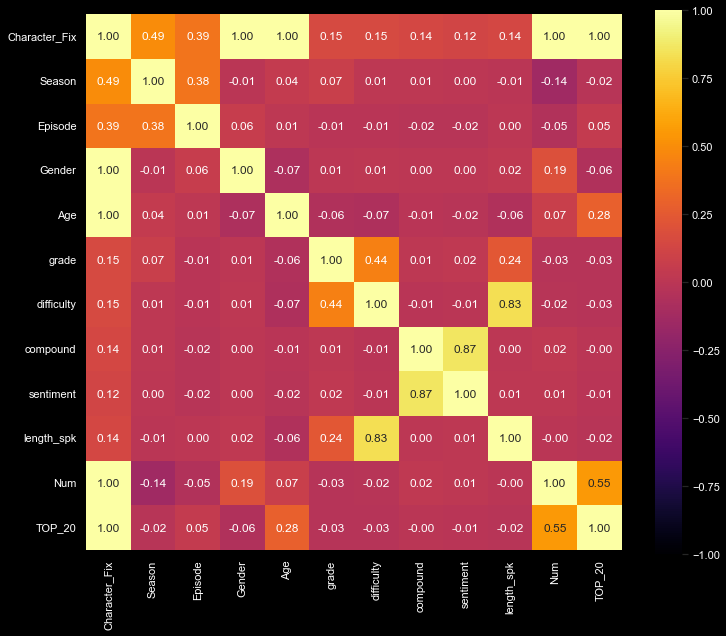

{'corr':                Character_Fix    Season   Episode    Gender       Age  \
 Character_Fix       1.000000  0.494903  0.387473  1.000000  1.000000   
 Season              0.494903  1.000000  0.384011 -0.006078  0.043230   
 Episode             0.387473  0.384011  1.000000  0.055306  0.014005   
 Gender              1.000000 -0.006078  0.055306  1.000000 -0.072709   
 Age                 1.000000  0.043230  0.014005 -0.072709  1.000000   
 grade               0.152737  0.071850 -0.008505  0.007776 -0.055783   
 difficulty          0.154191  0.009465 -0.013593  0.013168 -0.066315   
 compound            0.135174  0.010237 -0.015894  0.002223 -0.013818   
 sentiment           0.124143  0.004772 -0.016788  0.001705 -0.020397   
 length_spk          0.138263 -0.007762  0.000628  0.018665 -0.056638   
 Num                 1.000000 -0.139476 -0.054148  0.191477  0.072362   
 TOP_20              1.000000 -0.021343  0.045731 -0.055706  0.281704   
 
                   grade  difficulty  com

In [144]:
from dython.nominal import associations
from dython.nominal import identify_nominal_columns

train_corre=train_df2_fin.copy()

train_corre['TOP_20'] = train_corre['Character_Fix'].apply(lambda x: \
                                True if x in top20chars else False)
test_corre=test_df2_fin.copy()

test_corre['TOP_20'] = test_corre['Character_Fix'].apply(lambda x: \
                                True if x in top20chars else False)

check_corre = pd.concat([train_corre, test_corre], ignore_index=True, axis=0)

check_corre.drop(columns=['index','token_lemma'],axis = 1,inplace = True)

f = lambda x: 1 if x==True else 0
check_corre['TOP_20'] = check_corre['TOP_20'].apply(f)
print(check_corre.shape)
#!pip3 install dython

categorical_features=identify_nominal_columns(check_corre)
print(categorical_features)

associations(check_corre, nominal_columns='auto', 
             numerical_columns=None, mark_columns=False, 
             nom_nom_assoc='cramer', num_num_assoc='pearson', 
             cramers_v_bias_correction=True, nan_strategy=False,
             nan_replace_value=False, ax =sns.set(rc ={'xtick.labelcolor':'white',
                                                        'ytick.labelcolor':'white',
                                                       'figure.facecolor':'black'}),
             figsize=(12,10), annot=True, fmt='.2f', cmap="inferno",
             sv_color='black', cbar=True, vmax=1.0, vmin=None, plot=True,
             compute_only=False, clustering=False, title=None, filename=None)

### As we can see the Character Fix column does has correlation between the various features we added especially the season, episode, gender, age and num of words spoken in total along with top 20.  But we only kept where top 20 was True lets see what that correlation looks like on that dataframe instead, maybe we need to not filter out the data but run the model with the column as a feature in total.   

(4201, 12)
['Character_Fix']


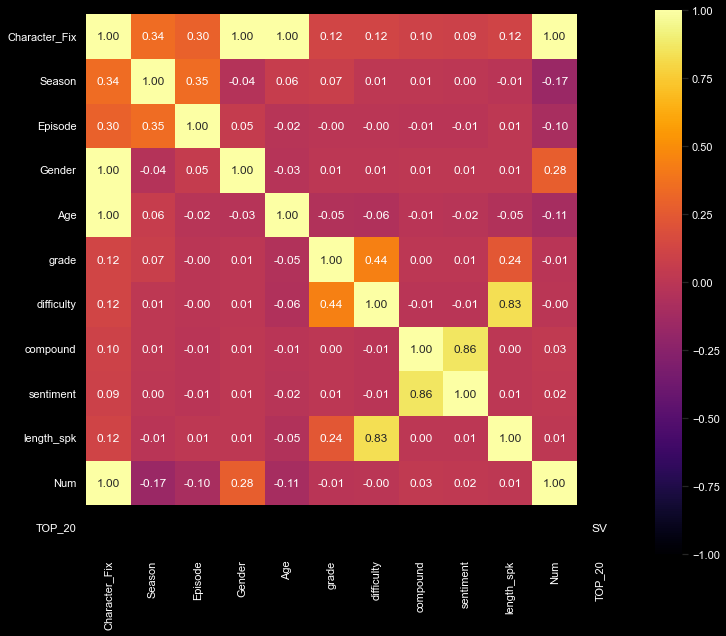

{'corr':                Character_Fix    Season   Episode    Gender       Age  \
 Character_Fix       1.000000  0.344454  0.295548  1.000000  1.000000   
 Season              0.344454  1.000000  0.346061 -0.038544  0.058444   
 Episode             0.295548  0.346061  1.000000  0.047220 -0.017570   
 Gender              1.000000 -0.038544  0.047220  1.000000 -0.025857   
 Age                 1.000000  0.058444 -0.017570 -0.025857  1.000000   
 grade               0.123508  0.070717 -0.003597  0.005235 -0.051219   
 difficulty          0.124998  0.014536 -0.000973  0.007740 -0.060944   
 compound            0.100097  0.014693 -0.010305  0.008403 -0.011551   
 sentiment           0.088480  0.004928 -0.013408  0.008881 -0.016351   
 length_spk          0.116627 -0.009877  0.008417  0.011692 -0.051105   
 Num                 1.000000 -0.168363 -0.099572  0.275224 -0.107688   
 TOP_20              0.000000  0.000000  0.000000  0.000000  0.000000   
 
                   grade  difficulty  com

In [151]:
train_20_corre = train_top20_fin.copy()
test_20_corre = test_top20_fin.copy()
train_20_corre['TOP_20'] = train_20_corre['Character_Fix'].apply(lambda x: \
                                True if x in top20chars else False)

test_20_corre['TOP_20'] = test_20_corre['Character_Fix'].apply(lambda x: \
                                True if x in top20chars else False)

check_corre20 = pd.concat([train_20_corre, test_20_corre], ignore_index=True, axis=0)

check_corre20.drop(columns=['level_0','index','token_lemma'],axis = 1,inplace = True)
print(check_corre20.shape)
f = lambda x: 1 if x==True else 0
check_corre20['TOP_20'] = check_corre20['TOP_20'].apply(f)

#!pip3 install dython

categorical_features20=identify_nominal_columns(check_corre20)
print(categorical_features20)

associations(check_corre20, nominal_columns='auto', 
             numerical_columns=None, mark_columns=False, 
             nom_nom_assoc='cramer', num_num_assoc='pearson', 
             cramers_v_bias_correction=True, nan_strategy=False,
             nan_replace_value=False, ax =sns.set(rc ={'xtick.labelcolor':'white',
                                                        'ytick.labelcolor':'white',
                                                       'figure.facecolor':'black'}),
             figsize=(12,10), annot=True, fmt='.2f', cmap="inferno",
             sv_color='black', cbar=True, vmax=1.0, vmin=None, plot=True,
             compute_only=False, clustering=False, title=None, filename=None)

### Some of the correlations are the same but some are lower for Character fix when just using top20 character data only, such as the drop in correlation for season and episode and the gender correlation to num of total lines spoken for a character was almost neutral a -0.06 but now its weighted at 0.28.  For LinearSVM since the score for test sets at various iterations have been perfect we are stopping here.

### make final dataframe of different score iterations for comparison in report and to other classification models we use/test